# Challenge 4
This challenge explores calculated fields, null-handling, and per capita analysis.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tariff_data = pd.read_csv('./data/Tariff Calculations plus Population.csv', delimiter=";")
tariff_data.columns = tariff_data.columns.str.strip().str.lower().str.replace(' ', '_')

cols_to_convert = ['us_2024_deficit', 'us_2024_exports', 'us_2024_imports_(customs_basis)']
for col in cols_to_convert:
    tariff_data[col] = tariff_data[col].astype(str).str.replace(',', '', regex= False)

## Task 1
Filter out rows where `population` is null or zero.

In [40]:
pop_tariff_data = tariff_data.dropna(subset='population')

## Task 2
Create two new columns:
   - `exports_per_capita` = `us_2024_exports` / `population`  
   - `imports_per_capita` = `us_2024_imports_customs_basis` / `population`

In [41]:
pop_tariff_data['exports_per_capita'] = pop_tariff_data['us_2024_exports'].astype(float)/pop_tariff_data['population'].astype(float)
pop_tariff_data['exports_per_capita']

/var/folders/ds/0fdzpn592cq6p2f7rr55tf240000gn/T/ipykernel_12817/4142697062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_tariff_data['exports_per_capita'] = pop_tariff_data['us_2024_exports'].astype(float)/pop_tariff_data['population'].astype(float)


0      2.749986e-07
1      5.160286e-05
2      2.197589e-05
3      6.060156e-05
4      1.856875e-05
           ...     
198    1.495361e-04
199    1.305223e-04
201    3.404348e-06
202    5.491227e-06
203    2.680404e-06
Name: exports_per_capita, Length: 172, dtype: float64

In [42]:
pop_tariff_data['imports_per_capita'] = pop_tariff_data['us_2024_imports_(customs_basis)'].astype(float)/pop_tariff_data['population'].astype(float)
pop_tariff_data['imports_per_capita']

/var/folders/ds/0fdzpn592cq6p2f7rr55tf240000gn/T/ipykernel_12817/455945066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_tariff_data['imports_per_capita'] = pop_tariff_data['us_2024_imports_(customs_basis)'].astype(float)/pop_tariff_data['population'].astype(float)


0      5.451726e-07
1      4.672298e-05
2      5.332268e-05
3      4.205006e-05
4      5.086272e-05
           ...     
198    2.115802e-04
199    1.360819e-03
201    2.259411e-07
202    8.159635e-06
203    4.149118e-06
Name: imports_per_capita, Length: 172, dtype: float64

## Task 3
Sort the data using a multi-index:
- First by `exports_per_capita` (descending)  
- Then by `imports_per_capita` (ascending)

In [43]:
pop_tariff_data = pop_tariff_data.sort_values(['exports_per_capita', 'imports_per_capita'], ascending=[False,True])
pop_tariff_data
#Note the reassignment to apply the new order to the df


,country,us_2024_deficit,us_2024_exports,us_2024_imports_(customs_basis),trump_tariffs_alleged,trump_response,population,exports_per_capita,imports_per_capita
189,Tuvalu (-),106,226,222,10%,10%,9816.0,2.302363e-02,2.261614e-02
160,Sint Maarten,652.4,753.9,101.5,10%,10%,42749.0,1.763550e-02,2.374325e-03
35,Cayman Islands,1237.10,1286.50,49.4,10%,10%,73038.0,1.761412e-02,6.763603e-04
72,Gibraltar,650.2,650.6,0.4,10%,10%,38471.0,1.691144e-02,1.039744e-05
188,Turks and Caicos Islands,702.6,713.6,11,10%,10%,46198.0,1.544656e-02,2.381055e-04
...,...,...,...,...,...,...,...,...,...
16,Belarus,-9.4,10.6,20,47%,24%,9178298.0,1.154898e-06,2.179053e-06
171,Sudan,43.5,56.6,13.1,10%,10%,50042791.0,1.131032e-06,2.617760e-07
86,Iran,84.6,90.8,6.2,10%,10%,90608707.0,1.002111e-06,6.842610e-08
30,Burundi,2.9,6.6,3.7,10%,10%,13689450.0,4.821231e-07,2.702811e-07


## Task 4
Identify the top 5 countries by `exports_per_capita`.

In [49]:
pop_tariff_data[['country', 'exports_per_capita']].head(5)
# No need to sort as it is still sorted from previous task.

,country,exports_per_capita
189,Tuvalu (-),0.023024
160,Sint Maarten,0.017636
35,Cayman Islands,0.017614
72,Gibraltar,0.016911
188,Turks and Caicos Islands,0.015447


# Task 5
Create a scatter plot of `exports_per_capita` vs. `imports_per_capita`, color-coded by `trade_balance_flag`.

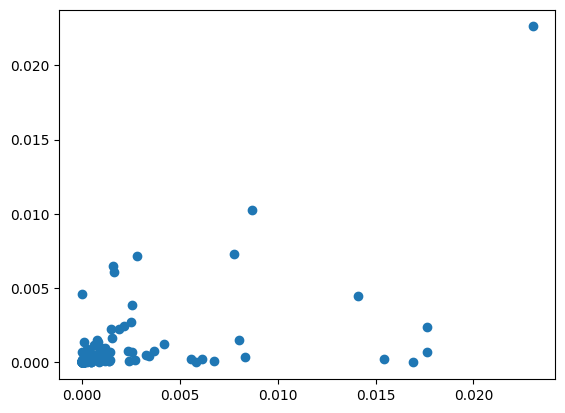

In [50]:
plt.scatter(pop_tariff_data['exports_per_capita'], pop_tariff_data['imports_per_capita'])